## Project: Time Series Forecasting
#### Estimate the unit sales of retail goods
Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

__Context__
* Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

* Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

__Potential Impact__
* If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

### 1. Import Libraries and Data

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from IPython.display import display, Markdown
import os
os.chdir('C:/Users/Younkyung Lee/OneDrive - Emory University/Recruiting/5_Projects/Time-Series-Forecasting')

In [141]:
df_oil = pd.read_csv("oil.csv")
df_holiday = pd.read_csv("holidays_events.csv")
df_train = pd.read_csv("train.csv")
df_store = pd.read_csv("stores.csv")
df_transactions = pd.read_csv("transactions.csv")
df_test = pd.read_csv("test.csv")

In [60]:
def display_dataset_summary(title, df):
    display(Markdown(f"### {title} Dataset"))
    display(Markdown(f"**First 5 Rows:**"))
    display(df.head(5))
    display(Markdown(f"**Last 5 Rows:**"))
    display(df.tail(5))
    display(Markdown(f"**Shape:** {df.shape}"))
    display(Markdown(f"{'-'*66}"))

# Display summaries for each dataset
display_dataset_summary("Train", df_train)
display_dataset_summary("Transactions", df_transactions)
display_dataset_summary("Holiday Events", df_holiday)
display_dataset_summary("Oil", df_oil)
display_dataset_summary("Stores", df_store)
display_dataset_summary("Transactions", df_transactions)


### Train Dataset

**First 5 Rows:**

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

**Last 5 Rows:**

id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

**Shape:** (3000888, 6)

------------------------------------------------------------------

### Test Dataset

**First 5 Rows:**

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

**Last 5 Rows:**

date  store_nbr  transactions
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

**Shape:** (83488, 3)

------------------------------------------------------------------

### Holiday Events Dataset

**First 5 Rows:**

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

**Last 5 Rows:**

date        type    locale locale_name description  transferred
345  2017-12-22  Additional  National     Ecuador   Navidad-3        False
346  2017-12-23  Additional  National     Ecuador   Navidad-2        False
347  2017-12-24  Additional  National     Ecuador   Navidad-1        False
348  2017-12-25     Holiday  National     Ecuador     Navidad        False
349  2017-12-26  Additional  National     Ecuador   Navidad+1        False

**Shape:** (350, 6)

------------------------------------------------------------------

### Oil Dataset

**First 5 Rows:**

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

**Last 5 Rows:**

date  dcoilwtico
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

**Shape:** (1218, 2)

------------------------------------------------------------------

### Stores Dataset

**First 5 Rows:**

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

**Last 5 Rows:**

store_nbr       city       state type  cluster
49         50     Ambato  Tungurahua    A       14
50         51  Guayaquil      Guayas    A       17
51         52      Manta      Manabi    A       11
52         53      Manta      Manabi    D       13
53         54  El Carmen      Manabi    C        3

**Shape:** (54, 5)

------------------------------------------------------------------

### Transactions Dataset

**First 5 Rows:**

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

**Last 5 Rows:**

date  store_nbr  transactions
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

**Shape:** (83488, 3)

------------------------------------------------------------------

In [142]:
#converting date feature to datetime data type
df_train["date"] = pd.to_datetime(df_train.date)
df_test["date"] = pd.to_datetime(df_test.date)
df_holiday["date"] = pd.to_datetime(df_holiday.date)
df_oil["date"] = pd.to_datetime(df_oil.date)
df_transactions["date"] = pd.to_datetime(df_transactions.date)

In [143]:
# helper function to do merge datasets 
def joins(df,holiday_events,oil,stores):
    print(df.shape)
    holiday_events=holiday_events.drop_duplicates(subset=['date'], keep='last')
    df_holiday=pd.merge(df,holiday_events,how="left",on='date', validate="many_to_one")
    print(f"Shape after merging with holiday {df_holiday.shape}")
    df_holiday_oil=pd.merge(df_holiday,oil,how="left",on='date')
    print(f"Shape after merging with holiday + oil {df_holiday_oil.shape}")
    df_holiday_oil_stores=pd.merge(df_holiday_oil,stores,how="left",on="store_nbr",suffixes=("holiday","stores"))
    print(f"Shape after merging with holiday + oil + stores {df_holiday_oil_stores.shape}")
    return df_holiday_oil_stores

In [144]:
train_df = joins(df_train, df_holiday, df_oil, df_store)
test_df = joins(df_test, df_holiday, df_oil, df_store)

(3000888, 6)
Shape after merging with holiday (3000888, 11)
Shape after merging with holiday + oil (3000888, 12)
Shape after merging with holiday + oil + stores (3000888, 16)
(28512, 5)
Shape after merging with holiday (28512, 10)
Shape after merging with holiday + oil (28512, 11)
Shape after merging with holiday + oil + stores (28512, 15)


### 2. Target Variable: Sales

1. __Time Series Analysis__: 
    * `Trend Analysis` indicated a steady increase over time, suggesting consistent growth. 
    * `Seasonal` patterns were also evident, especially with end of year increase such as Black Friday, Christmas, or other year-end festivities
    * `Autocorrelation` function revealed significant correlations at certain lags, particularly on a weekly and monthly basis, hinting at underlying weekly business rhythms and monthly reporting cycles. 

2. __Product Category & Store Analysis__: 
    * Although the overall trend is upward, each category shows different patterns in trends. Home Appliances and Lingerie, for example, show a downward trend; There were no book sales; Trend for frozen food shows a unexpected leap. 
    * All the stores show relatively stable upward trends. Store 52, however, seems to be recently opened. 

#### 2-1. Time Series Analysis

In [82]:
df_tr = train_df.copy()

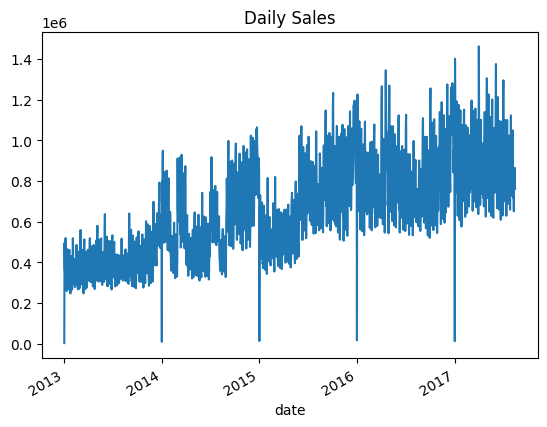

In [7]:
# Aggregate data by day
daily_sales = df_tr.groupby('date').sum()['sales']
daily_sales.plot(title='Daily Sales')
plt.show()

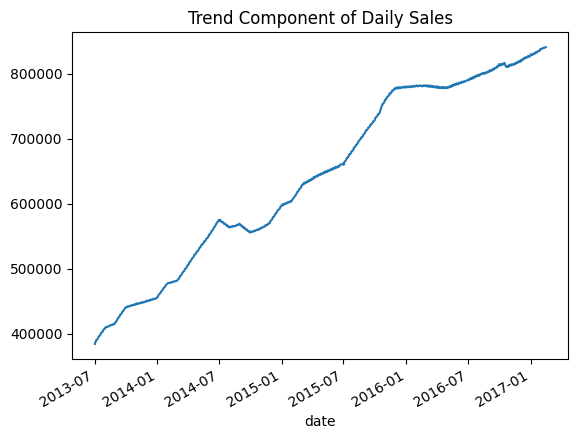

In [20]:
# Decompose the time series
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
trend = decomposition.trend
trend.plot(title='Trend Component of Daily Sales')
plt.show()

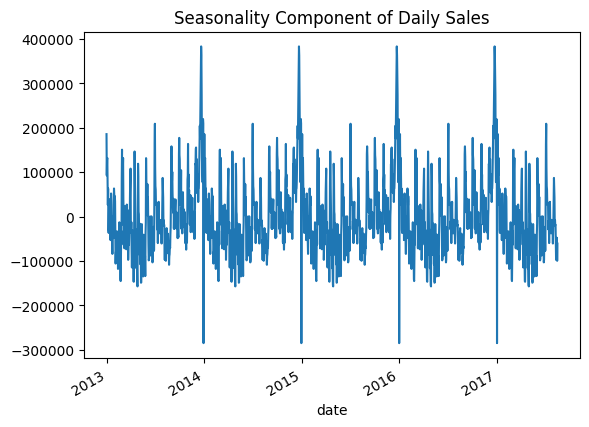

In [41]:
# Seasonal Decomposition
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonality = decomposition.seasonal

# Plot the seasonality component
seasonality.plot(title='Seasonality Component of Daily Sales')
plt.show()

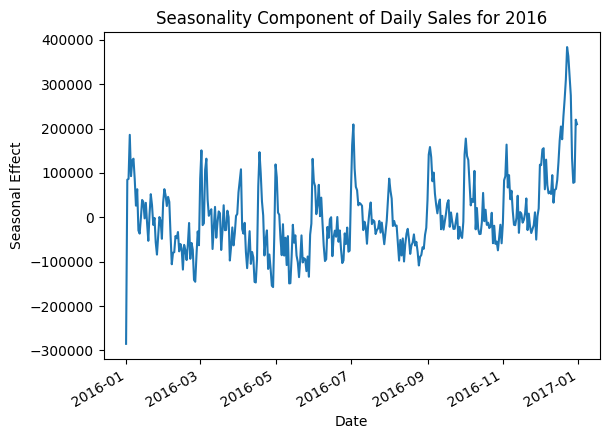

In [39]:
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonality = decomposition.seasonal

one_year_seasonality = seasonality['2016']
one_year_seasonality.plot(title='Seasonality Component of Daily Sales for 2016')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.show()

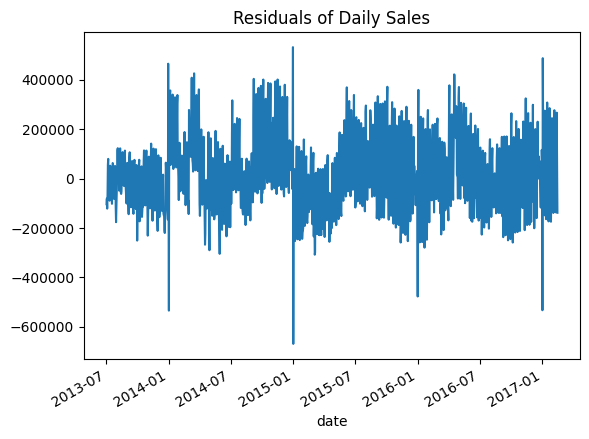

In [42]:
# Residuals
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonality = decomposition.resid

# Plot the seasonality component
seasonality.plot(title='Residuals of Daily Sales')
plt.show()

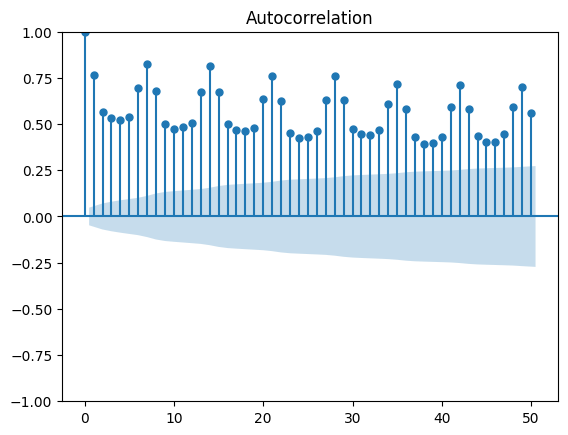

Autocorrelation at lag 2: 0.5641565259375267


In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_sales, lags=50)
plt.show()

specific_lag = 2
autocorrelation_at_lag = daily_sales.autocorr(lag=specific_lag)
print(f'Autocorrelation at lag {specific_lag}: {autocorrelation_at_lag}')

#### 2-2. Product Category & Store Analysis

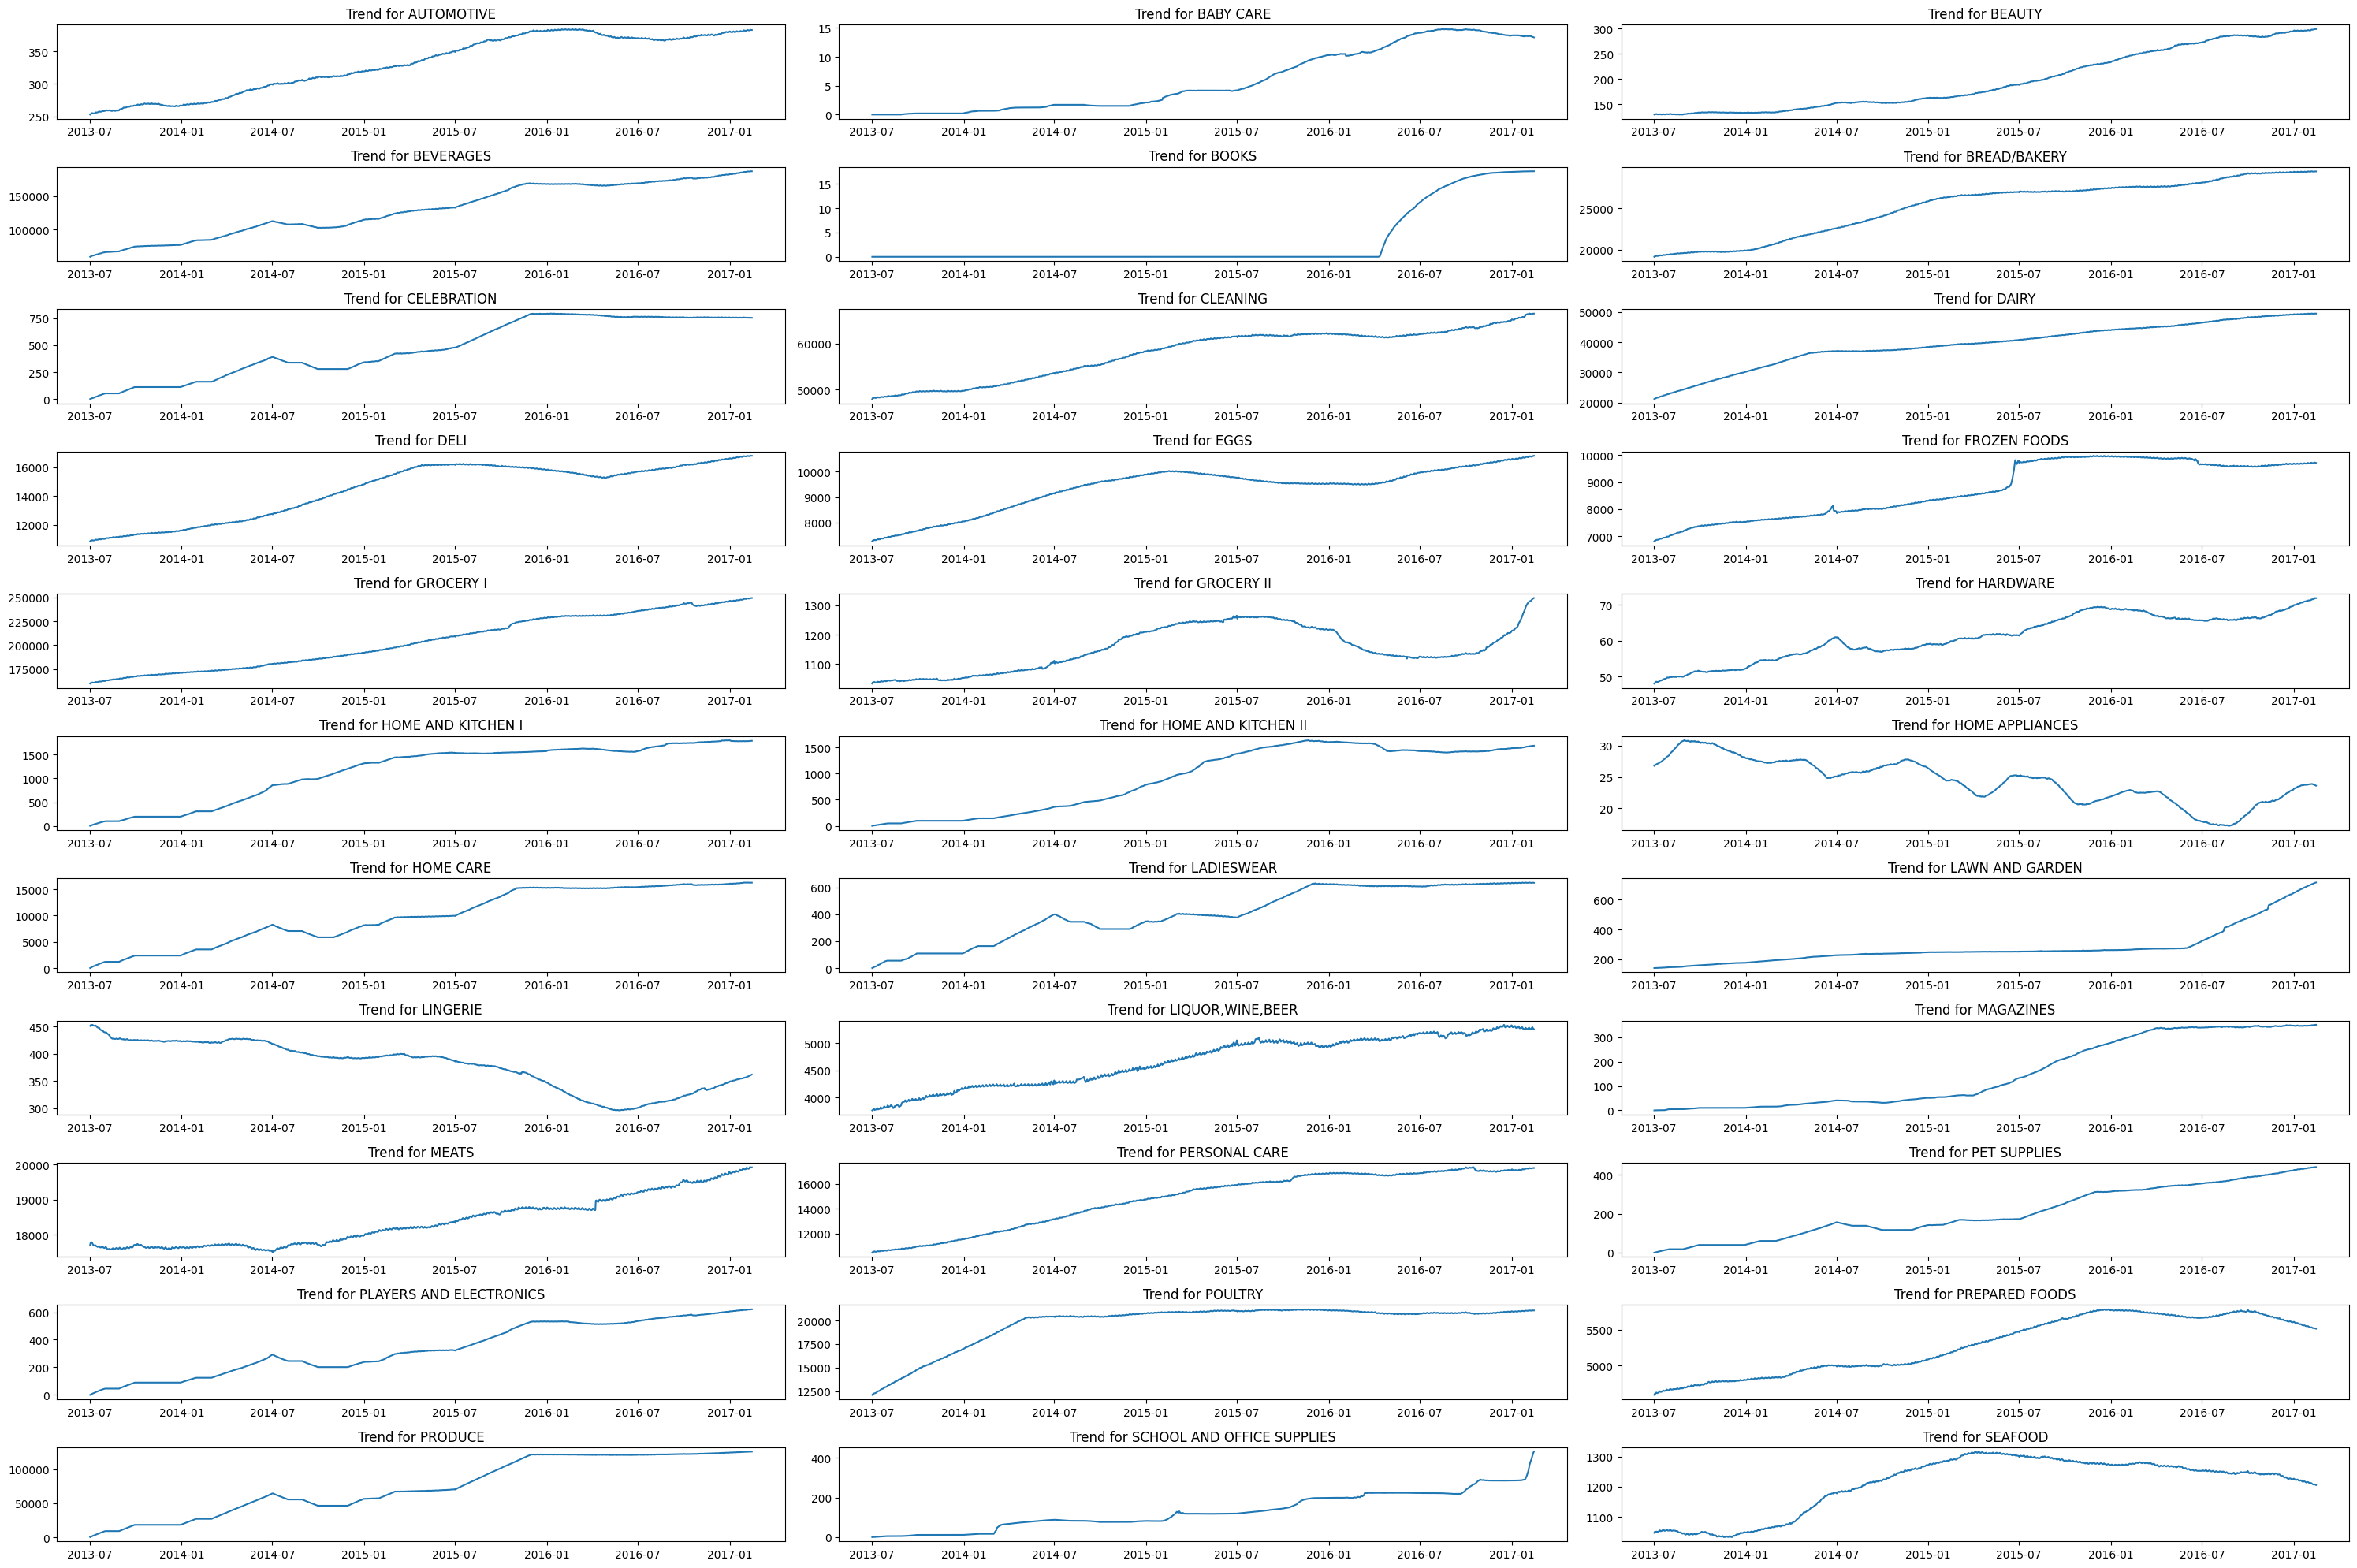

In [49]:
# Trend by Category
categories = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS','BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES', 
       'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']

# Number of categories to plot per row and column
rows = 11
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(30, 20))  # Adjust figsize as needed
axs = axs.flatten()

for i, category in enumerate(categories):
    df_temp = df_tr[df_tr['family'] == category]
    sales_temp = df_temp.groupby('date').sum()['sales']
    decomposition = seasonal_decompose(sales_temp.dropna(), model='additive', period=365)
    trend = decomposition.trend

    # Clear the ith subplot before plotting
    axs[i].clear()

    # Plotting the trend component on the ith subplot
    axs[i].plot(trend)
    axs[i].set_title(f'Trend for {category}')

plt.tight_layout()
plt.show()

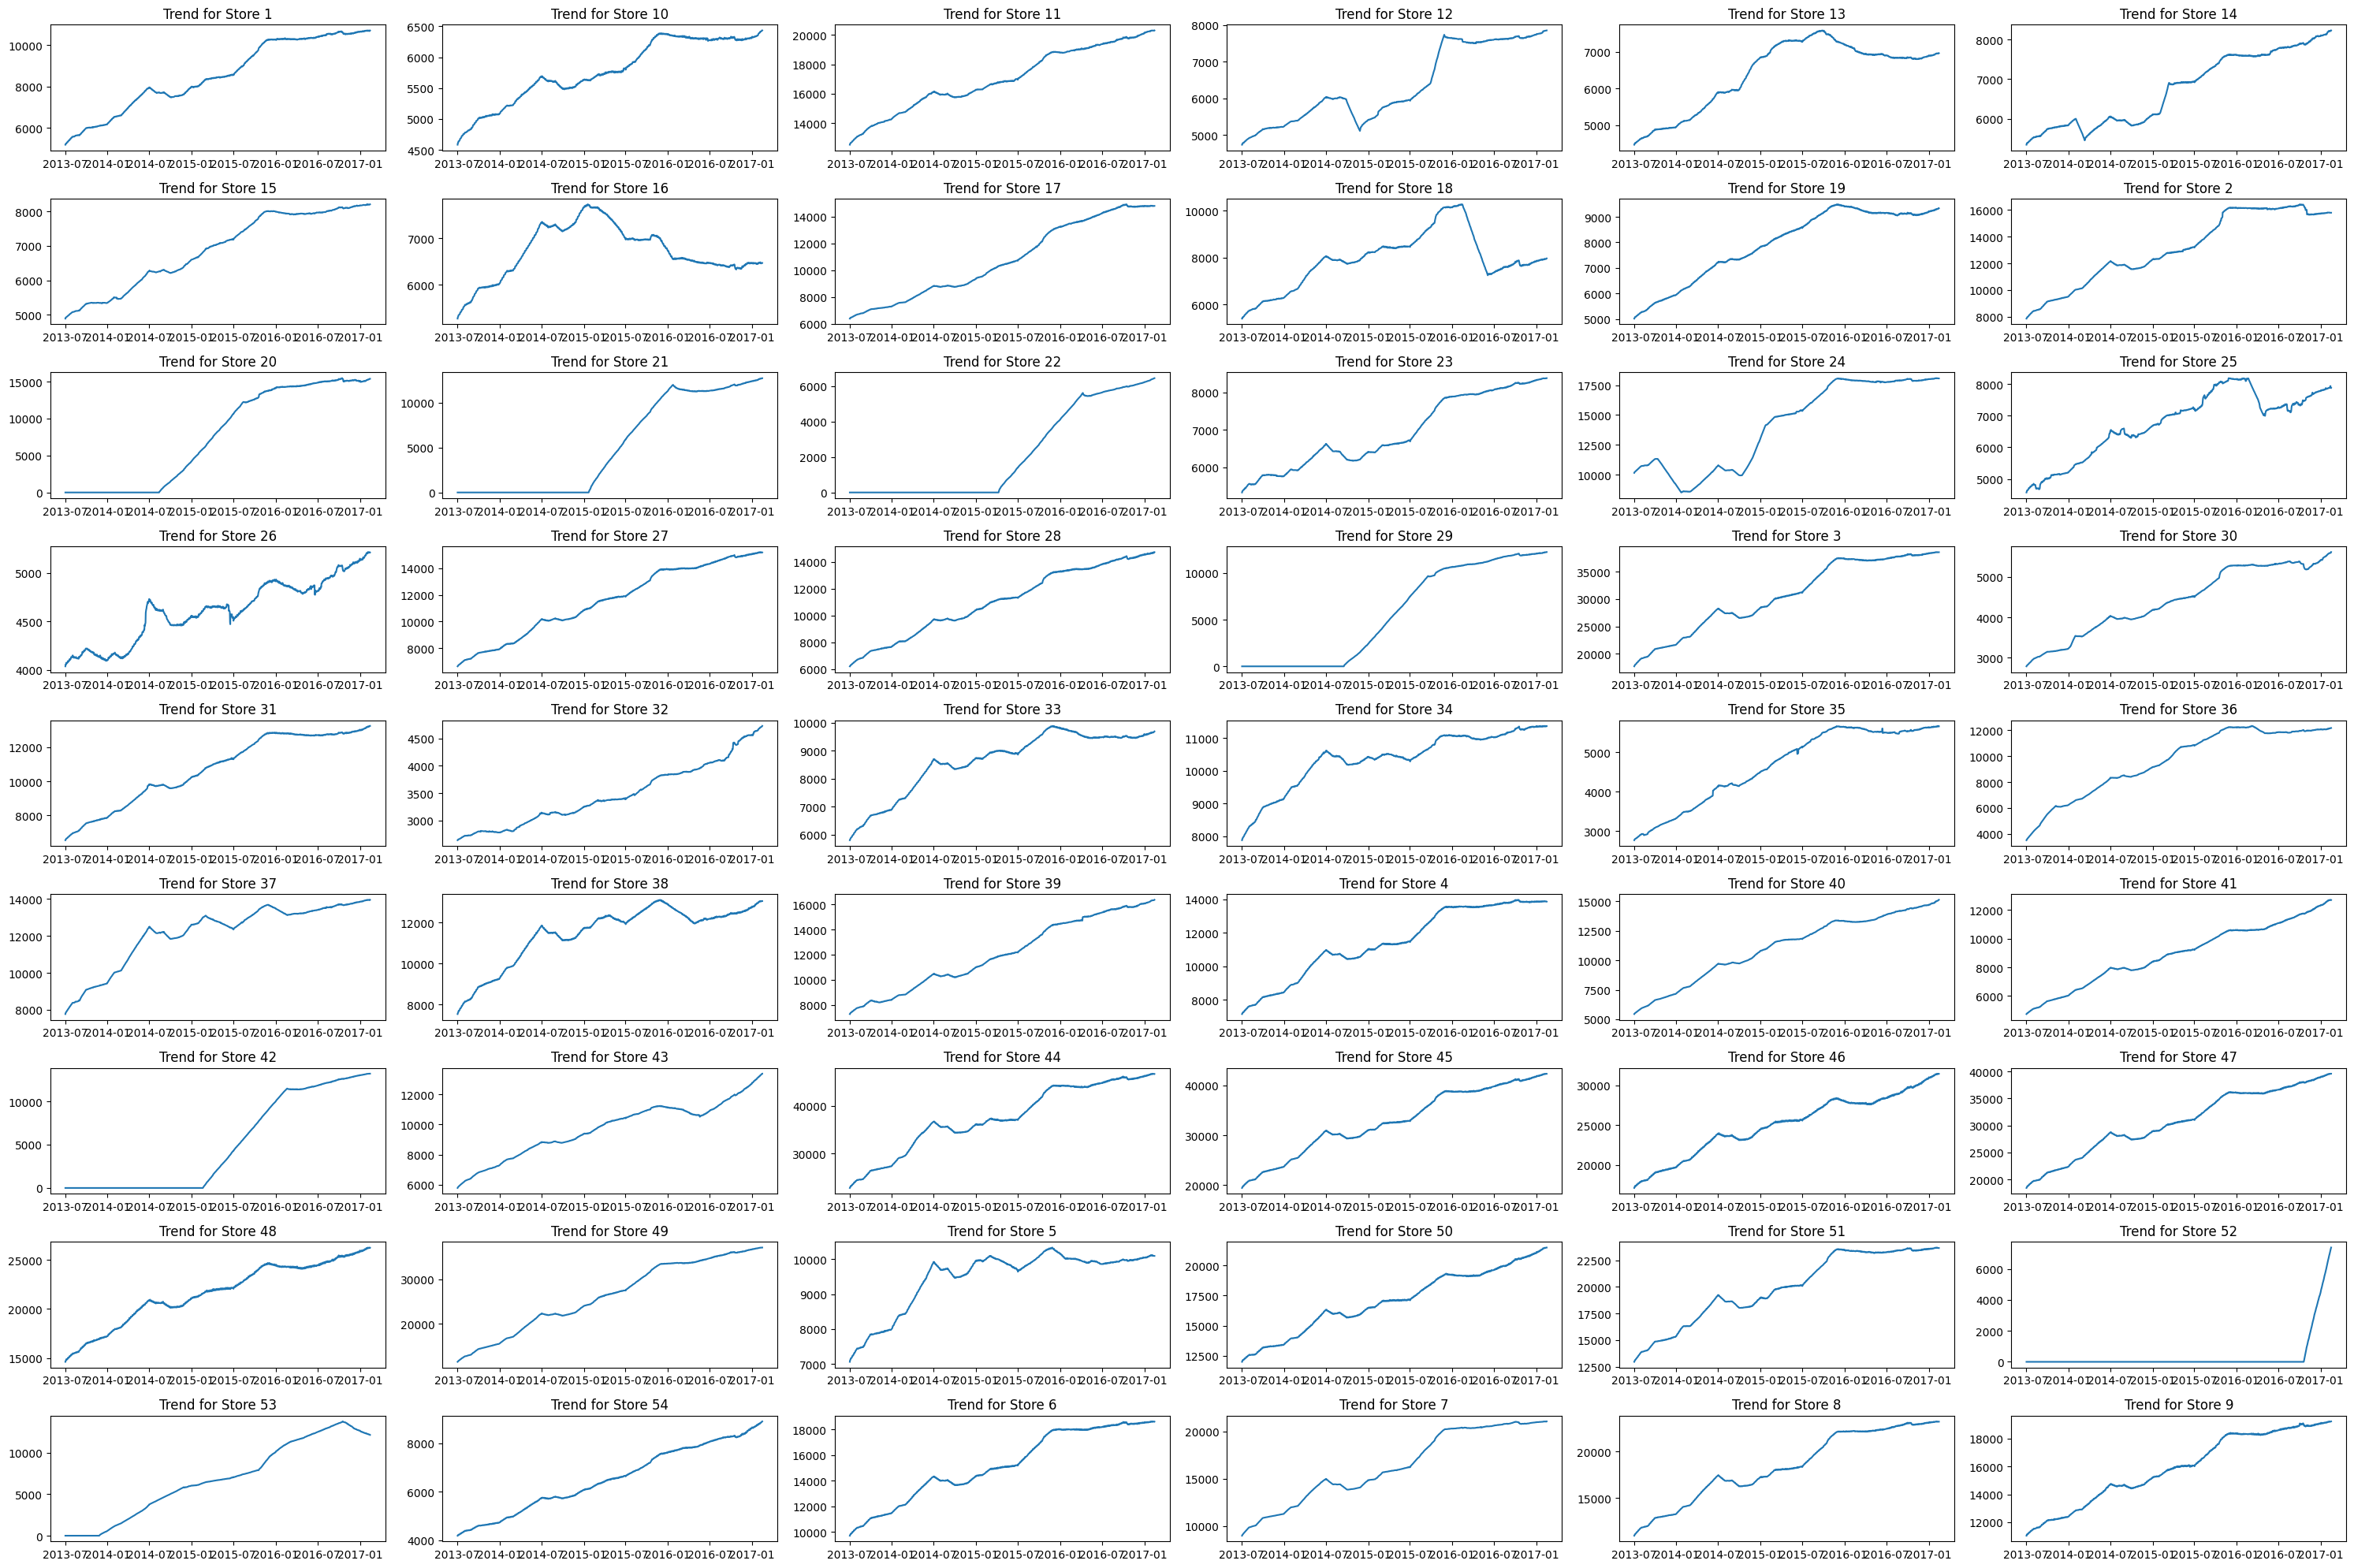

In [51]:
stores = [ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 
          35, 36, 37, 38, 39,  4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6, 7,  8,  9]

# Number of categories to plot per row and column
rows = 9
cols = 6

fig, axs = plt.subplots(rows, cols, figsize=(30, 20))  # Adjust figsize as needed
axs = axs.flatten()

for i, store in enumerate(stores):
    df_temp = df_tr[df_tr['store_nbr'] == store]
    sales_temp = df_temp.groupby('date').sum()['sales']
    decomposition = seasonal_decompose(sales_temp.dropna(), model='additive', period=365)
    trend = decomposition.trend

    # Clear the ith subplot before plotting
    axs[i].clear()

    # Plotting the trend component on the ith subplot
    axs[i].plot(trend)
    axs[i].set_title(f'Trend for Store {store}')

plt.tight_layout()
plt.show()

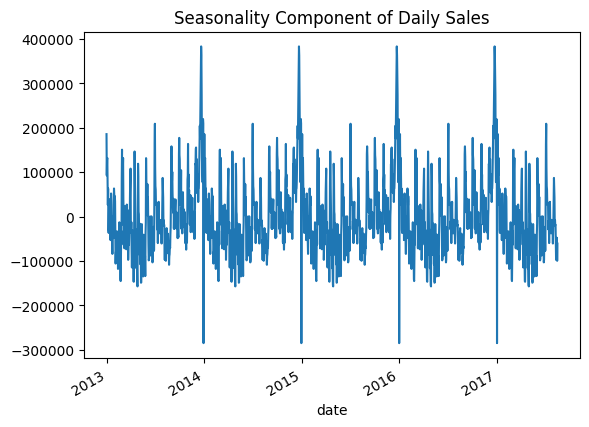

In [57]:
# Decompose the time series
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonality = decomposition.seasonal

# Plot the seasonality component
seasonality.plot(title='Seasonality Component of Daily Sales')
plt.show()

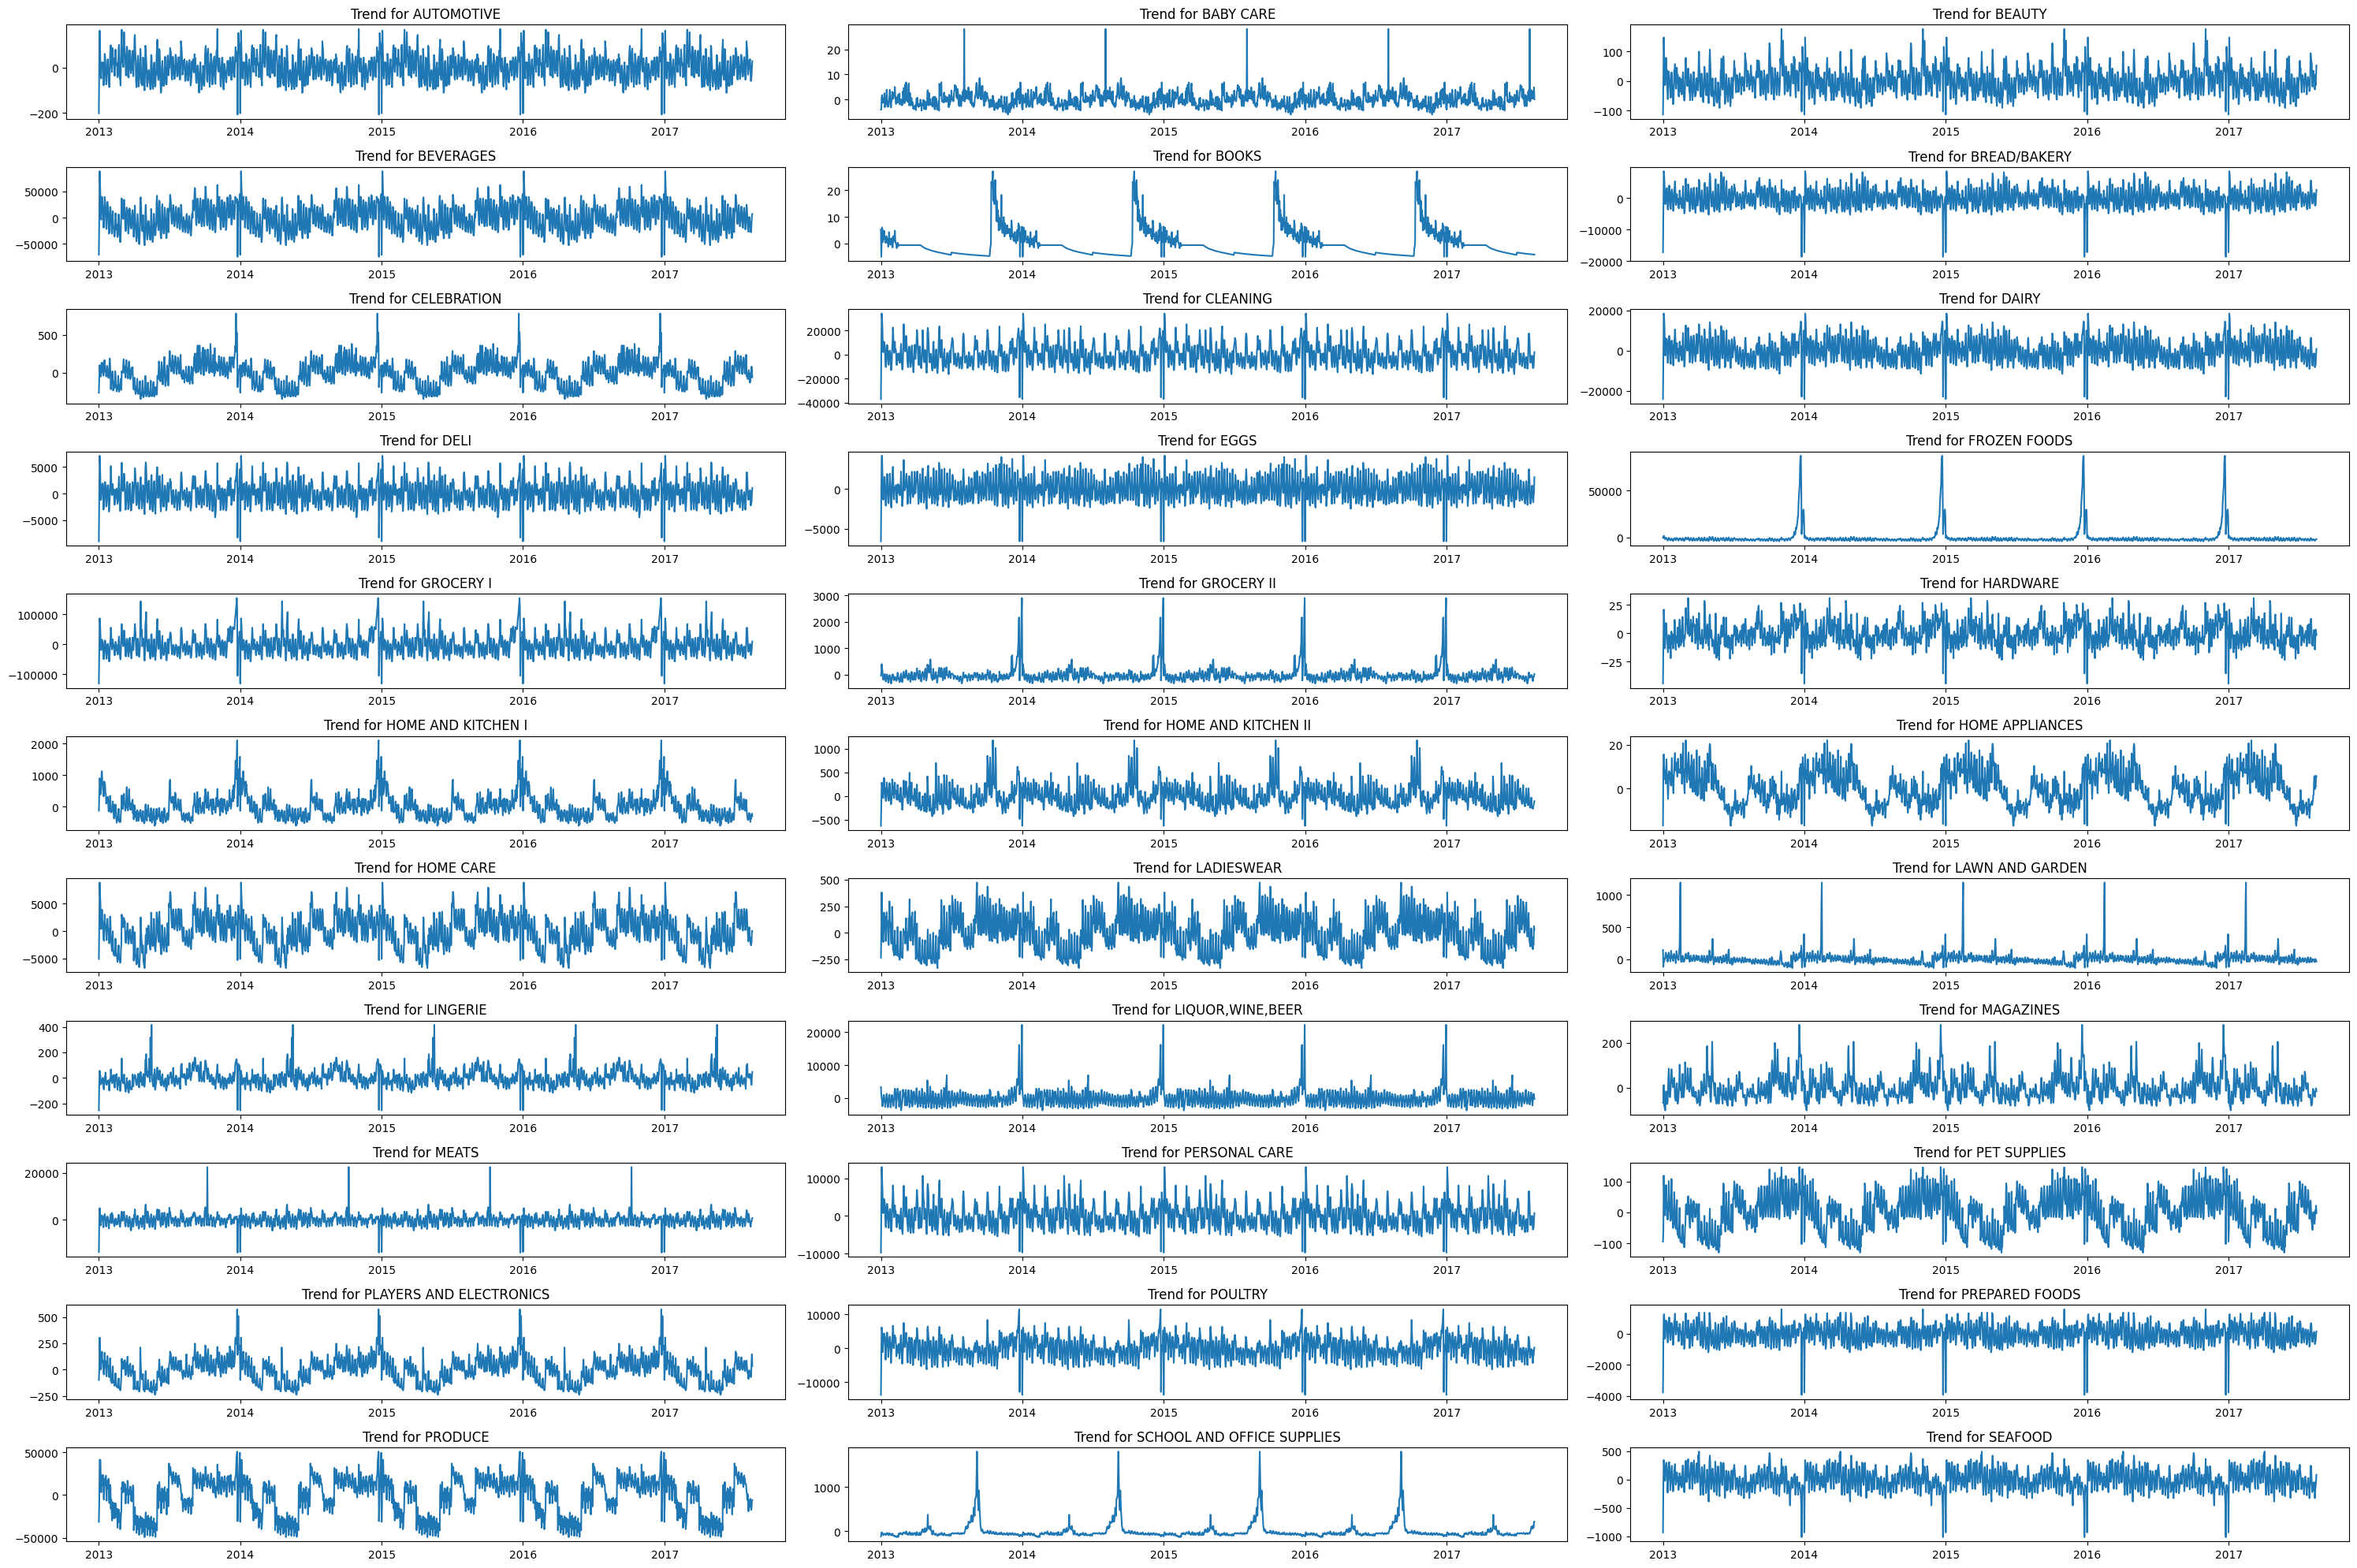

In [35]:
# Trend by Category
categories = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS','BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES', 
       'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']

# Number of categories to plot per row and column
rows = 11
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(30, 20))  # Adjust figsize as needed
axs = axs.flatten()

for i, category in enumerate(categories):
    df_temp = df_tr[df_tr['family'] == category]
    sales_temp = df_temp.resample('D').sum()['sales']
    decomposition = seasonal_decompose(sales_temp.dropna(), model='additive', period=365)
    trend = decomposition.seasonal

    # Clear the ith subplot before plotting
    axs[i].clear()

    # Plotting the trend component on the ith subplot
    axs[i].plot(trend)
    axs[i].set_title(f'Trend for {category}')

plt.tight_layout()
plt.show()

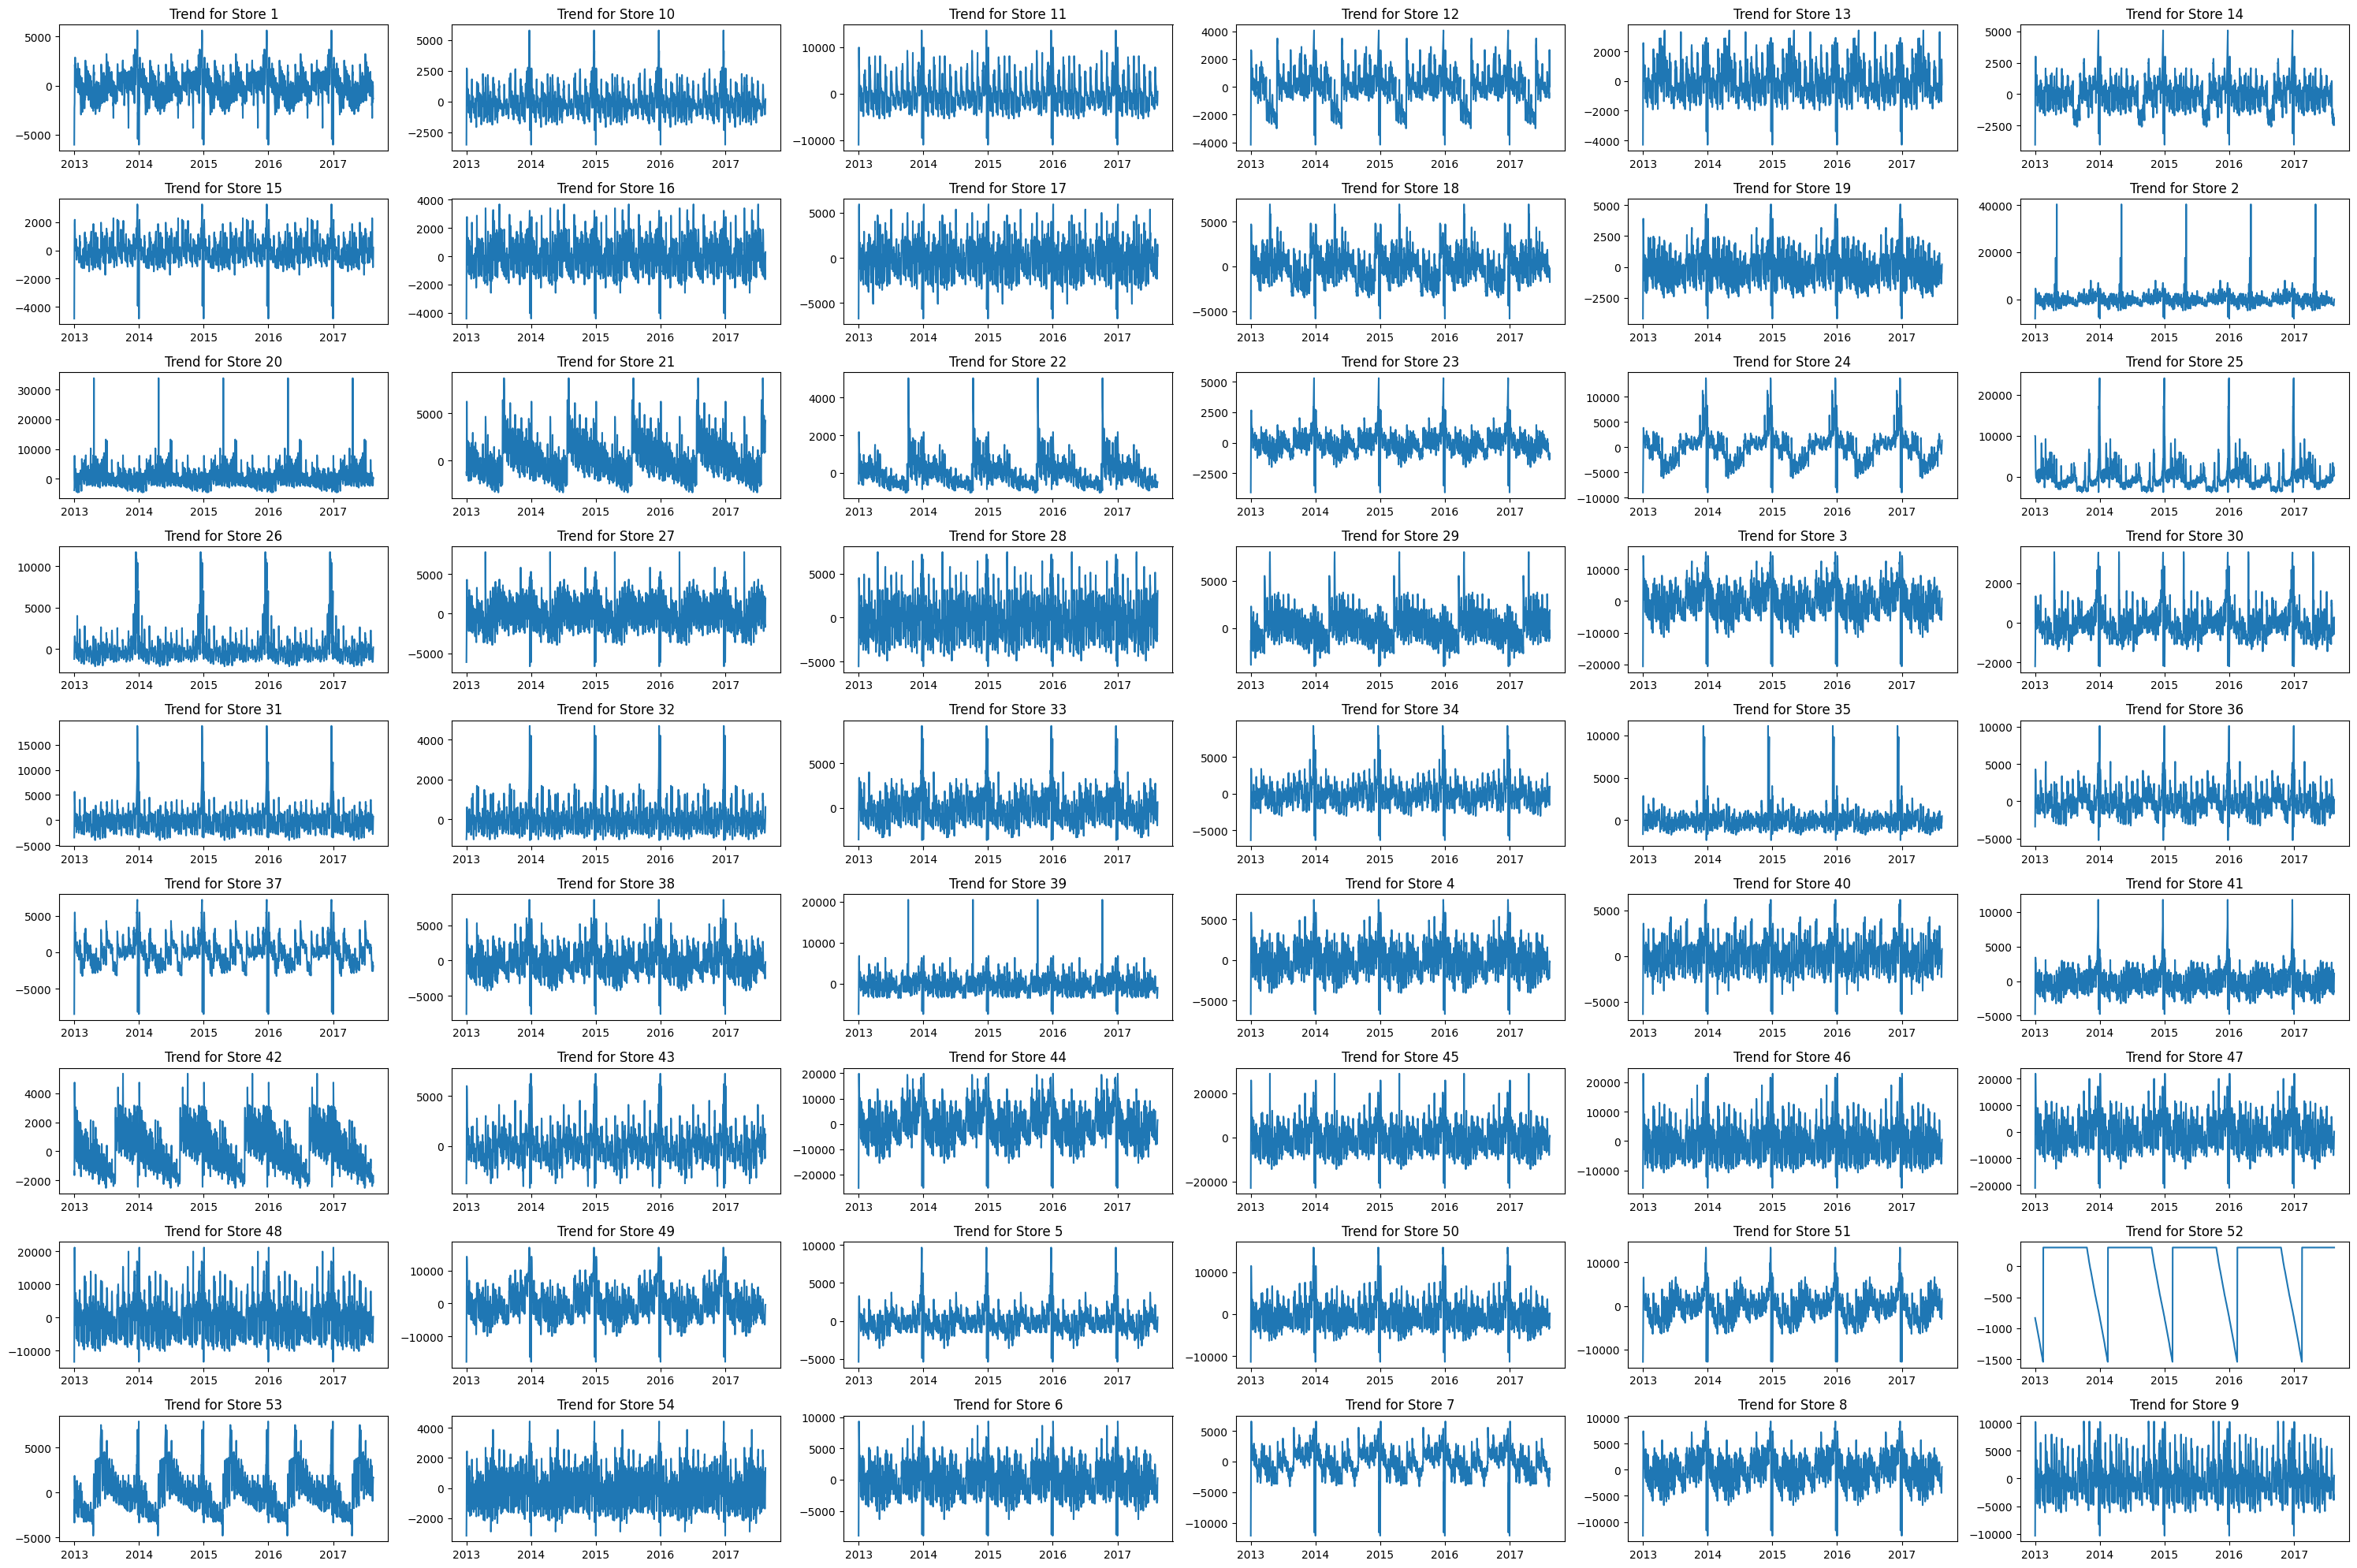

In [36]:
stores = [ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 
          35, 36, 37, 38, 39,  4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6, 7,  8,  9]

# Number of categories to plot per row and column
rows = 9
cols = 6

fig, axs = plt.subplots(rows, cols, figsize=(30, 20))  # Adjust figsize as needed
axs = axs.flatten()

for i, store in enumerate(stores):
    df_temp = df_tr[df_tr['store_nbr'] == store]
    sales_temp = df_temp.resample('D').sum()['sales']
    decomposition = seasonal_decompose(sales_temp.dropna(), model='additive', period=365)
    trend = decomposition.seasonal

    # Clear the ith subplot before plotting
    axs[i].clear()

    # Plotting the trend component on the ith subplot
    axs[i].plot(trend)
    axs[i].set_title(f'Trend for Store {store}')

plt.tight_layout()
plt.show()

#### 2-3. Descriptive Analytics

<Axes: xlabel='family'>

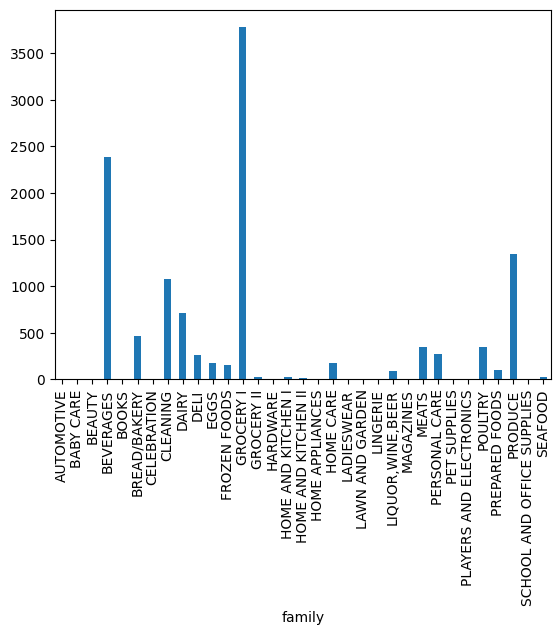

In [9]:
df_tr.groupby('family')['sales'].mean().plot(kind = 'bar')

C:\Users\Younkyung Lee\AppData\Local\Temp\ipykernel_20820\463125413.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


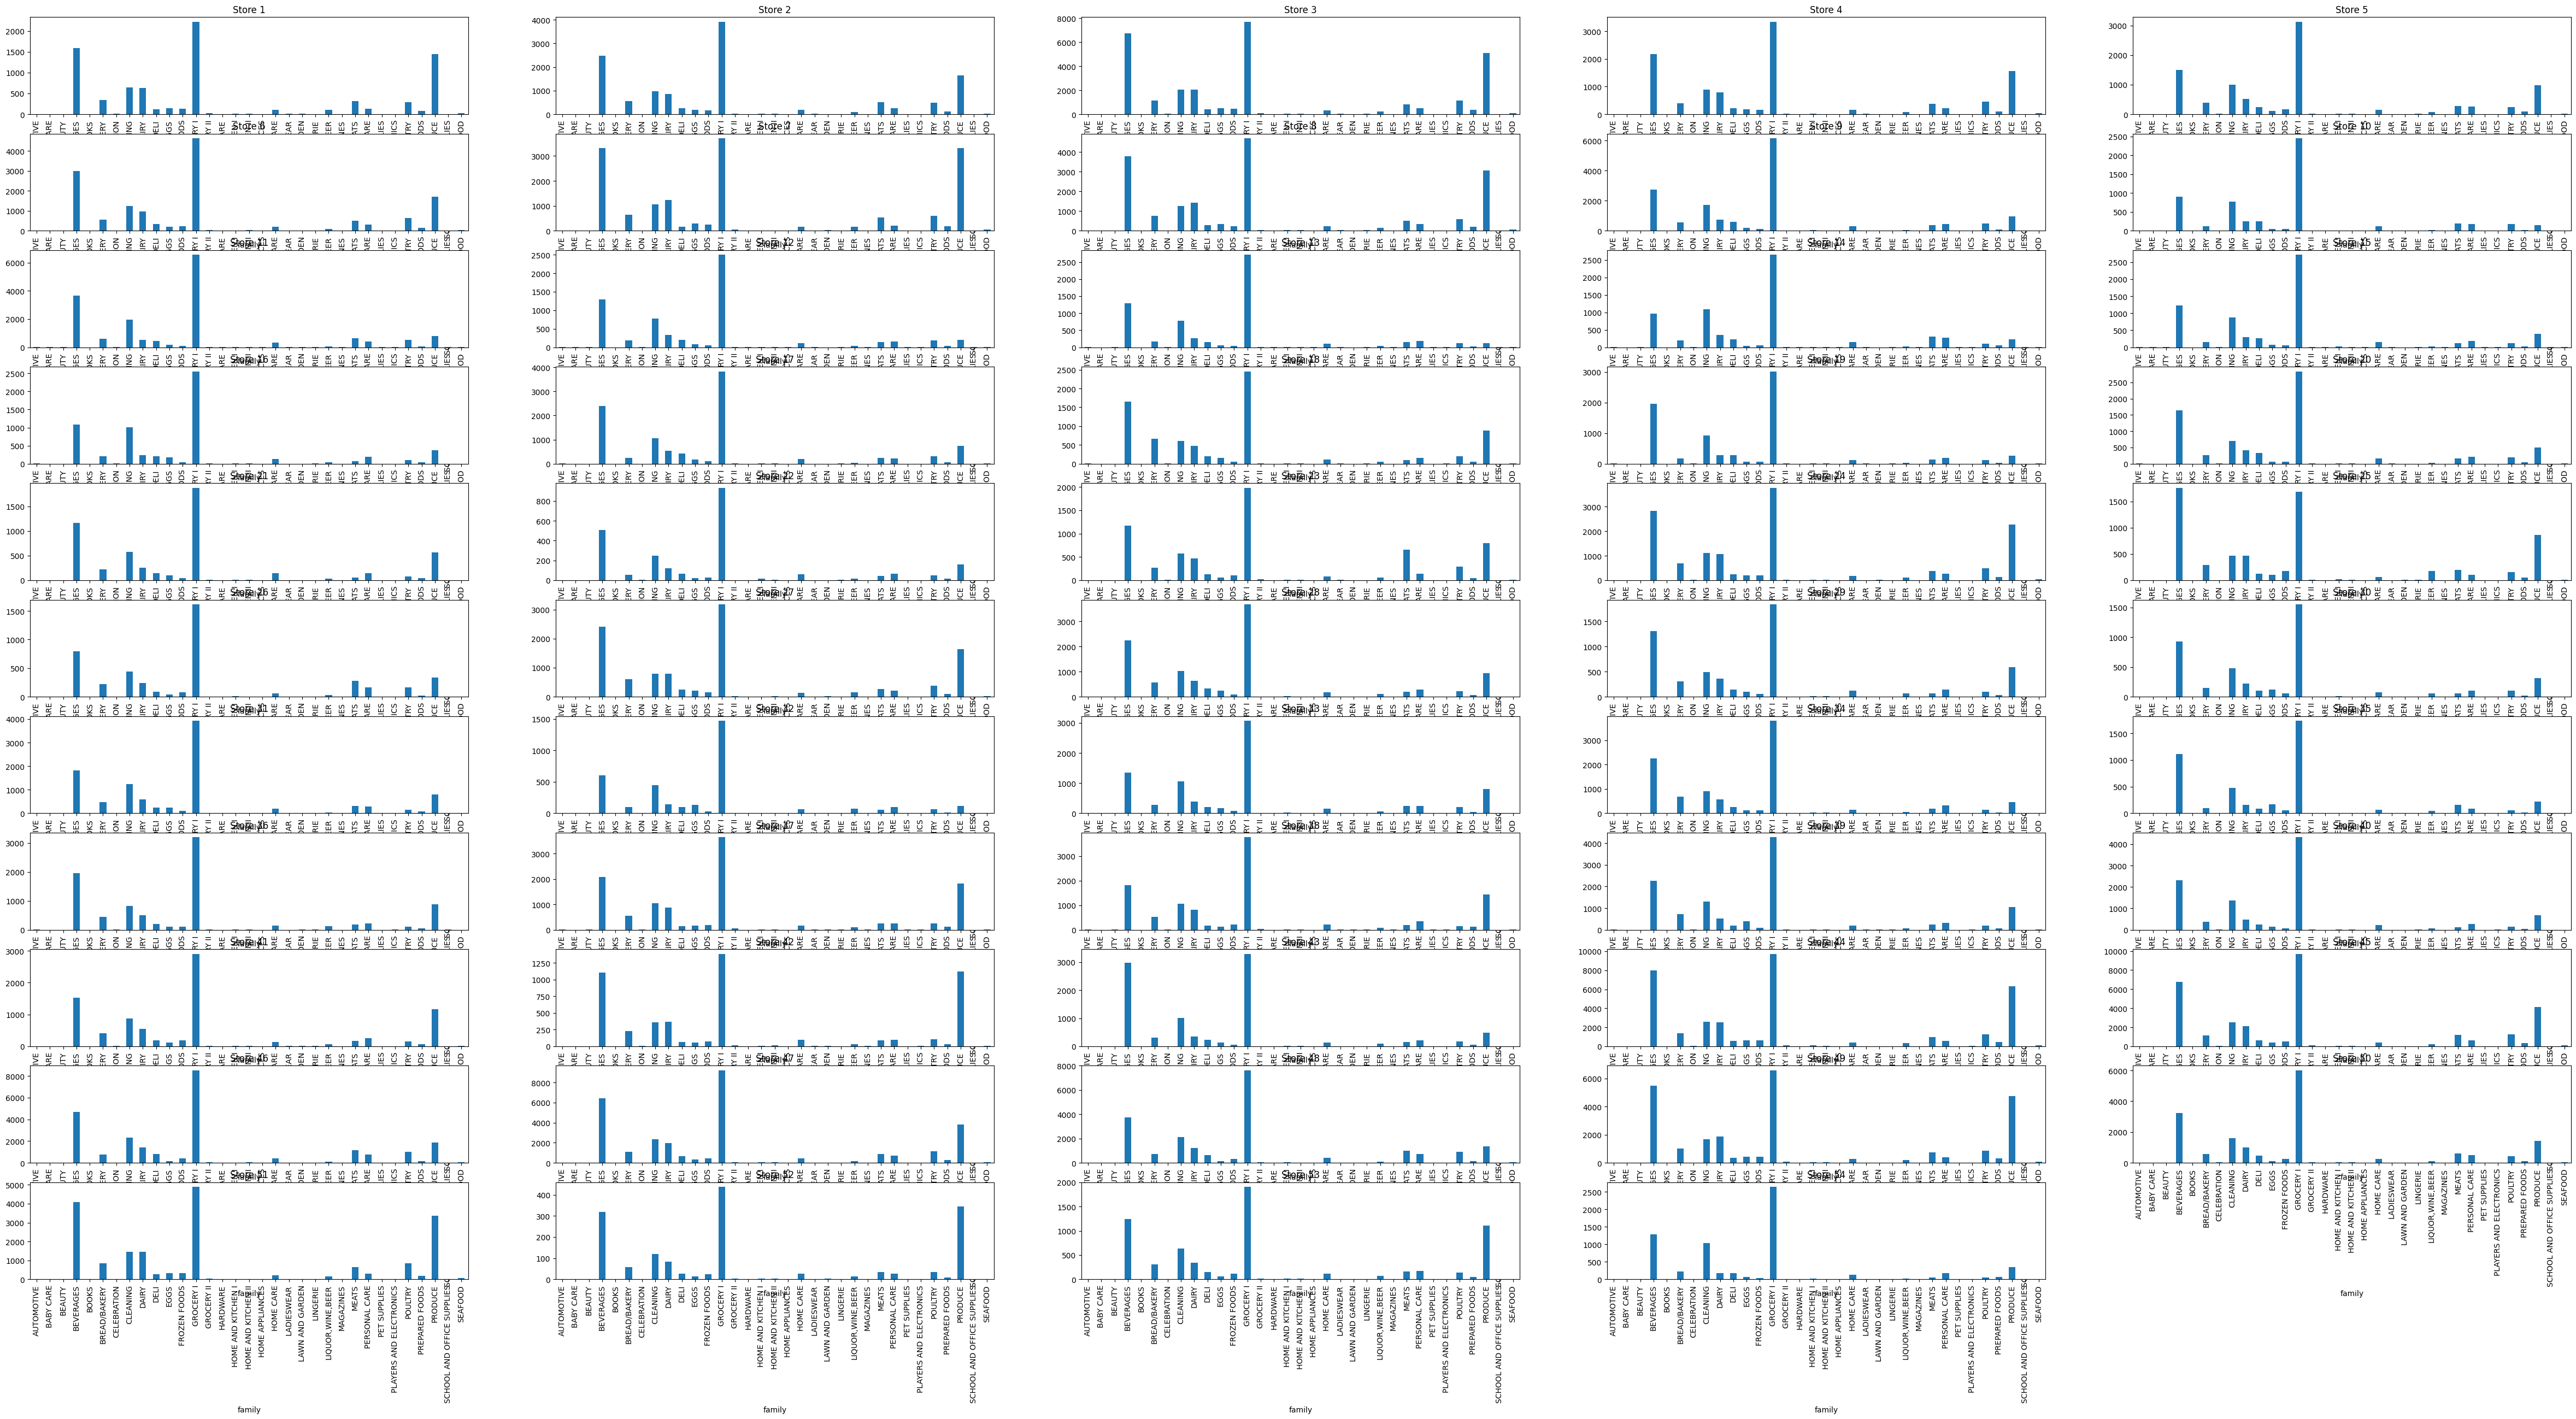

In [10]:
stores = np.arange(1, 55)

# Number of categories to plot per row and column
rows = 11
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(60, 30))  # Adjust figsize as needed
axs = axs.flatten()

for i, store in enumerate(stores):
    df_temp = df_tr.loc[df_tr['store_nbr'] == store, :]
    df_temp.groupby('family')['sales'].mean().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f"Store {store}")

# Turn off extra subplots
for j in range(i+1, rows*cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='store_nbr'>

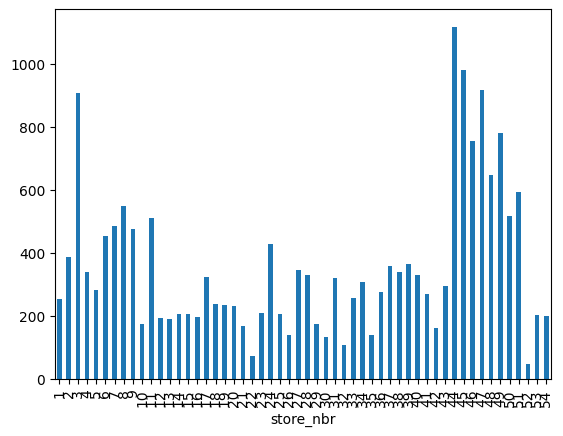

In [11]:
df_tr.groupby('store_nbr')['sales'].mean().plot(kind = 'bar')

In [13]:
df_tr.groupby('family')['sales'].mean().reset_index()

family        sales
0                   AUTOMOTIVE     6.101236
1                    BABY CARE     0.110528
2                       BEAUTY     3.715723
3                    BEVERAGES  2385.793151
4                        BOOKS     0.070797
5                 BREAD/BAKERY   463.336254
6                  CELEBRATION     8.370469
7                     CLEANING  1072.416744
8                        DAIRY   709.154889
9                         DELI   265.135067
10                        EGGS   171.420516
11                FROZEN FOODS   154.766954
12                   GROCERY I  3776.972100
13                  GROCERY II    21.584048
14                    HARDWARE     1.137833
15          HOME AND KITCHEN I    20.470342
16         HOME AND KITCHEN II    16.722420
17             HOME APPLIANCES     0.457476
18                   HOME CARE   176.198029
19                  LADIESWEAR     7.160629
20             LAWN AND GARDEN     6.035475
21                    LINGERIE     7.182128
22            LIQUOR,WINE,BEER    85.187824
23                   MAGAZINES     2.929082
24                       MEATS   341.849965
25               PERSONAL CARE   270.432513
26                PET SUPPLIES     3.921263
27     PLAYERS AND ELECTRONICS     6.186857
28                     POULTRY   350.532292
29              PREPARED FOODS    96.770202
30                     PRODUCE  1349.352123
31  SCHOOL AND OFFICE SUPPLIES     2.961599
32                     SEAFOOD    22.163190

In [15]:
df_tr.groupby('family')['sales'].median().reset_index()

family      sales
0                   AUTOMOTIVE     5.0000
1                    BABY CARE     0.0000
2                       BEAUTY     2.0000
3                    BEVERAGES  1784.0000
4                        BOOKS     0.0000
5                 BREAD/BAKERY   401.0000
6                  CELEBRATION     3.0000
7                     CLEANING   938.0000
8                        DAIRY   520.0000
9                         DELI   218.9715
10                        EGGS   131.0000
11                FROZEN FOODS    83.0000
12                   GROCERY I  3185.0000
13                  GROCERY II    12.0000
14                    HARDWARE     1.0000
15          HOME AND KITCHEN I    12.0000
16         HOME AND KITCHEN II     9.0000
17             HOME APPLIANCES     0.0000
18                   HOME CARE   143.0000
19                  LADIESWEAR     0.0000
20             LAWN AND GARDEN     1.0000
21                    LINGERIE     5.0000
22            LIQUOR,WINE,BEER    47.0000
23                   MAGAZINES     0.0000
24                       MEATS   224.9365
25               PERSONAL CARE   222.0000
26                PET SUPPLIES     0.0000
27     PLAYERS AND ELECTRONICS     2.0000
28                     POULTRY   205.7430
29              PREPARED FOODS    63.9600
30                     PRODUCE   398.2905
31  SCHOOL AND OFFICE SUPPLIES     0.0000
32                     SEAFOOD     8.0000

In [14]:
df_tr.groupby('family')['sales'].std().reset_index()

family        sales
0                   AUTOMOTIVE     6.191691
1                    BABY CARE     0.681064
2                       BEAUTY     4.794668
3                    BEVERAGES  2307.882305
4                        BOOKS     0.547981
5                 BREAD/BAKERY   368.246367
6                  CELEBRATION    15.927114
7                     CLEANING   734.681493
8                        DAIRY   671.949638
9                         DELI   210.417073
10                        EGGS   161.826783
11                FROZEN FOODS   324.971305
12                   GROCERY I  2874.208845
13                  GROCERY II    31.062425
14                    HARDWARE     1.638040
15          HOME AND KITCHEN I    35.967646
16         HOME AND KITCHEN II    31.298823
17             HOME APPLIANCES     0.969551
18                   HOME CARE   209.916580
19                  LADIESWEAR    13.946302
20             LAWN AND GARDEN    12.283458
21                    LINGERIE     9.474520
22            LIQUOR,WINE,BEER   126.555637
23                   MAGAZINES     6.008492
24                       MEATS   455.908498
25               PERSONAL CARE   226.512007
26                PET SUPPLIES     7.657852
27     PLAYERS AND ELECTRONICS    10.544497
28                     POULTRY   400.511631
29              PREPARED FOODS   104.695144
30                     PRODUCE  2186.481332
31  SCHOOL AND OFFICE SUPPLIES    21.745937
32                     SEAFOOD    32.627628

In [ ]:
df_tr.groupby('store_nbr')['sales'].std().reset_index()

### 3. Features

1. __Oil Price__: 46 missing values - filled with interpolation. First missing value was filled with backward fill. Correlation between unit sales and oil price. negative? 

2. __Transactions__:

3. __Promotion__:

4. __Holiday__:
    * If no event occured, there is no date in the holiday table. By joining this table, Null values are generated for days with no holiday.
    * Then we performed one-hot encoding for holiday types, thereby getting seperate columns for each event type: `Holiday`, `Event`, `Transfer`, `Additional`, `Bridge`, `Work Day`
    * We also performed one-hot encoding for locale type, thereby getting seperate columns for each event type: `National`, `Local`, `Regional`


#### 3-1. Daily Crude Oil Price

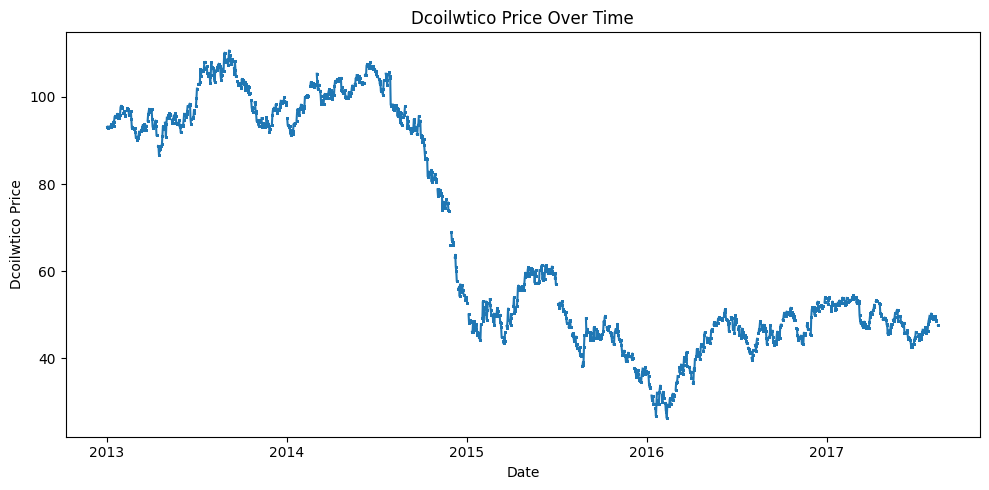

In [145]:
# Plotting the data, ignoring NaN values.
plt.figure(figsize=(10, 5))
plt.plot(train_df['date'], train_df['dcoilwtico'], marker='o', markersize= 0.4)

# Adding title and labels.
plt.title('Dcoilwtico Price Over Time')
plt.xlabel('Date')
plt.ylabel('Dcoilwtico Price')

# Displaying the plot.
plt.tight_layout()
plt.show()

In [147]:
def interpolate_join(df):
    temp = df[['date', 'dcoilwtico']].groupby('date').mean()
    temp = temp['dcoilwtico'].interpolate(method='linear')
    temp.bfill(inplace = True)
    df = df.drop(columns = ['dcoilwtico'])
    final_df = df.merge(temp, on = 'date')
    return final_df

In [149]:
train_df = interpolate_join(train_df)
test_df = interpolate_join(test_df)

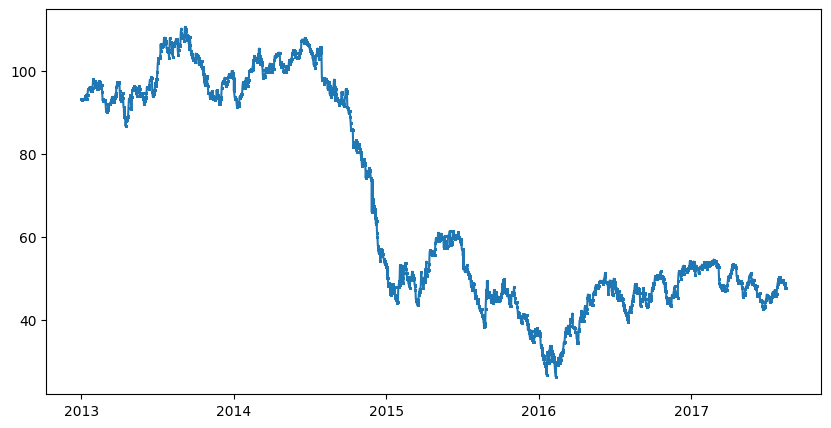

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(df_tr['date'], df_tr['dcoilwtico'], marker='o', markersize= 0.4)

In [155]:
# correlation between daily oil price & daily sales
df_sales = train_df[['date', 'sales']].groupby('date').mean()
df_crude = train_df[['date', 'dcoilwtico']].set_index('date')
combined_df = df_sales.join(df_crude, how='inner')

In [156]:
combined_df['sales'].corr(combined_df['dcoilwtico'])

-0.6279947931767678

Text(0, 0.5, 'Sales')

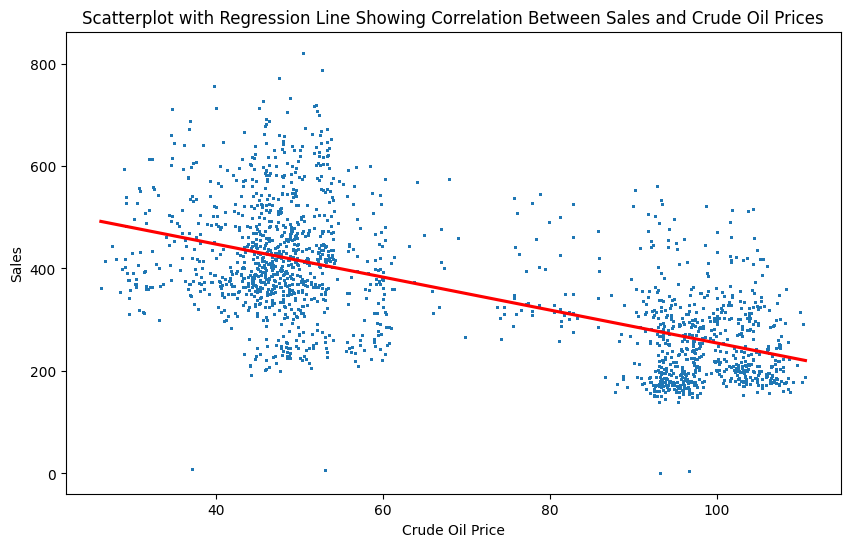

In [157]:
# Scatterplot with regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='dcoilwtico', y='sales', data=combined_df, ci=None, scatter_kws={'s': 1}, line_kws={'color': 'red'})

# You can customize the plot with matplotlib functions
plt.title('Scatterplot with Regression Line Showing Correlation Between Sales and Crude Oil Prices')
plt.xlabel('Crude Oil Price')
plt.ylabel('Sales')

#### 3-2. Promotions

In [168]:
train_df['onpromotion']

0            0
1            0
2            0
3            0
4            0
          ... 
3000883      0
3000884      1
3000885    148
3000886      8
3000887      0
Name: onpromotion, Length: 3000888, dtype: int64

In [180]:
# Additional Feature Engineering
bins = [-1, 1, 10, 50, 100, 742] 
labels = ['No promotion', 'Low', 'Medium', 'High', 'Very high']
train_df['onpromotion_binned'] = pd.cut(train_df['onpromotion'], bins=bins, labels=labels)

#### 3-3. Holidays

In [173]:
train_df.head()

id       date  store_nbr      family  sales  onpromotion typeholiday  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0     Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0     Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0     Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0     Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0     Holiday   

     locale locale_name         description transferred   city      state  \
0  National     Ecuador  Primer dia del ano       False  Quito  Pichincha   
1  National     Ecuador  Primer dia del ano       False  Quito  Pichincha   
2  National     Ecuador  Primer dia del ano       False  Quito  Pichincha   
3  National     Ecuador  Primer dia del ano       False  Quito  Pichincha   
4  National     Ecuador  Primer dia del ano       False  Quito  Pichincha   

  typestores  cluster  dcoilwtico  
0          D       13       93.14  
1          D       13       93.14  
2          D       13       93.14  
3          D       13       93.14  
4          D       13       93.14

In [175]:
#checking value counts of holiday types
display(train_df["typeholiday"].value_counts(dropna=False))

typeholiday
NaN           2551824
Holiday        263736
Event           98010
Additional      58806
Transfer        16038
Work Day         8910
Bridge           3564
Name: count, dtype: int64

In [176]:
# helper function to convert transfered holidays to normal days
def holiday_fix(df):
    df["typeholiday"]=np.where(df["transferred"]==True,'NDay',df["typeholiday"]) # fill transferred day with NDay
    df["typeholiday"]=np.where(df["typeholiday"]=='Work Day','NDay',df["typeholiday"]) # fill work day with NDay
    df["typeholiday"]=df["typeholiday"].fillna("NDay") # fill na with NDay 
    return df

In [177]:
train_df = holiday_fix(train_df)
test_df = holiday_fix(test_df)

In [178]:
train_df["typeholiday"].value_counts(dropna=False)

typeholiday
NDay          2576772
Holiday        247698
Event           98010
Additional      58806
Transfer        16038
Bridge           3564
Name: count, dtype: int64

### 4. Feature Engineering

In [ ]:
# Feature Importance
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your dataset
# df = pd.read_csv('your_dataset.csv')
# For the purpose of this example, let's assume df is already loaded and preprocessed

# Split the data into features and target variable
X = df.drop('target_variable', axis=1)  # Replace 'target_variable' with the name of your target column
y = df['target_variable']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame to plot the most important features on top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.show()

In [182]:
# extracting time features for test dataset

def extract_time_features(df):
    df['day_of_week'] = df['date'].dt.day_of_week
    df['day_of_week'] = df['day_of_week']+1
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

In [183]:
train_df = extract_time_features(train_df)
test_df = extract_time_features(test_df)

In [185]:
train_df

id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion typeholiday    locale locale_name            description  \
0                  0     Holiday  National     Ecuador     Primer dia del ano   
1                  0     Holiday  National     Ecuador     Primer dia del ano   
2                  0     Holiday  National     Ecuador     Primer dia del ano   
3                  0     Holiday  National     Ecuador     Primer dia del ano   
4                  0     Holiday  National     Ecuador     Primer dia del ano   
...              ...         ...       ...         ...                    ...   
3000883            0     Holiday     Local    Riobamba  Fundacion de Riobamba   
3000884            1     Holiday     Local    Riobamba  Fundacion de Riobamba   
3000885          148     Holiday     Local    Riobamba  Fundacion de Riobamba   
3000886            8     Holiday     Local    Riobamba  Fundacion de Riobamba   
3000887            0     Holiday     Local    Riobamba  Fundacion de Riobamba   

        transferred   city      state typestores  cluster  dcoilwtico  \
0             False  Quito  Pichincha          D       13       93.14   
1             False  Quito  Pichincha          D       13       93.14   
2             False  Quito  Pichincha          D       13       93.14   
3             False  Quito  Pichincha          D       13       93.14   
4             False  Quito  Pichincha          D       13       93.14   
...             ...    ...        ...        ...      ...         ...   
3000883       False  Quito  Pichincha          B        6       47.57   
3000884       False  Quito  Pichincha          B        6       47.57   
3000885       False  Quito  Pichincha          B        6       47.57   
3000886       False  Quito  Pichincha          B        6       47.57   
3000887       False  Quito  Pichincha          B        6       47.57   

        onpromotion_binned  day_of_week  month  year  
0             No promotion            2      1  2013  
1             No promotion            2      1  2013  
2             No promotion            2      1  2013  
3             No promotion            2      1  2013  
4             No promotion            2      1  2013  
...                    ...          ...    ...   ...  
3000883       No promotion            2      8  2017  
3000884       No promotion            2      8  2017  
3000885          Very high            2      8  2017  
3000886                Low            2      8  2017  
3000887       No promotion            2      8  2017  

[3000888 rows x 20 columns]

In [190]:
# select features 

def select_relevant(df):
    print(f"shape before removing columns {df.shape}")
    features=["date","family","sales","onpromotion","typeholiday","dcoilwtico","city","state",
              "typestores","cluster","day_of_week","month","year"]
    if "sales" in df.columns:
        df= df[features]
    else:
        features.remove("sales")
        df= df[features]
    print(f"Shape after removing columns {df.shape}")
    return df

In [193]:
train_df = select_relevant(train_df)
test_df = select_relevant(test_df)
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')

shape before removing columns (3000888, 20)
Shape after removing columns (3000888, 13)
shape before removing columns (28512, 18)
Shape after removing columns (28512, 12)
